In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [3]:
df.shape

(2000, 31)

In [4]:
class_distribution = df['Class'].value_counts()
class_distribution

Class
0    1974
1      26
Name: count, dtype: int64

In [5]:
df['Time'].min()

153.0

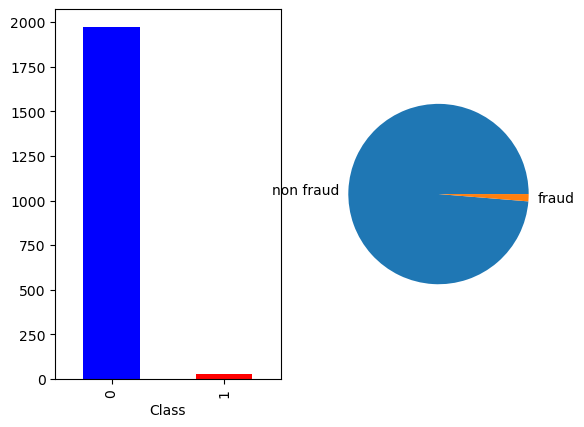

In [6]:
plt.subplot(1,2,1)
class_distribution.plot(kind = 'bar', color= ['blue', 'red'])

plt.subplot(1,2,2)
class_distribution.plot(kind = 'pie', color= ['blue', 'red'], labels = ['non fraud', 'fraud'])
plt.ylabel(" ")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

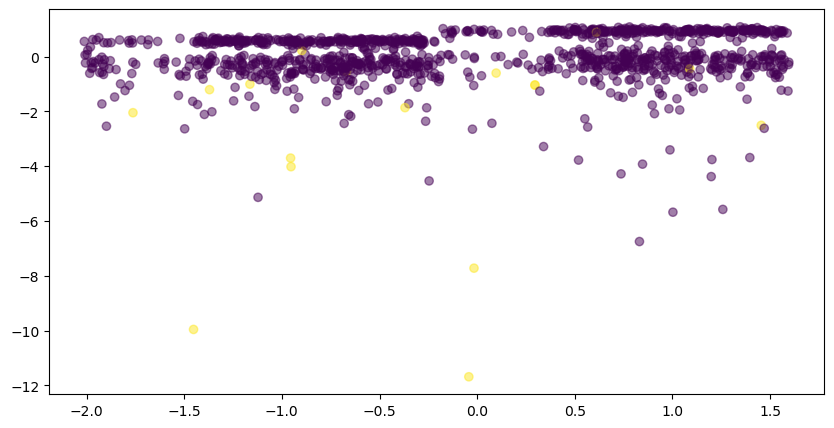

In [11]:
plt.figure(figsize = (10,5))
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c = y_train, cmap = 'viridis', alpha = 0.5)
plt.show()

In [13]:
smote = SMOTE()
X_train_smote, y_train_smote =  smote.fit_resample(X_train_sc, y_train)

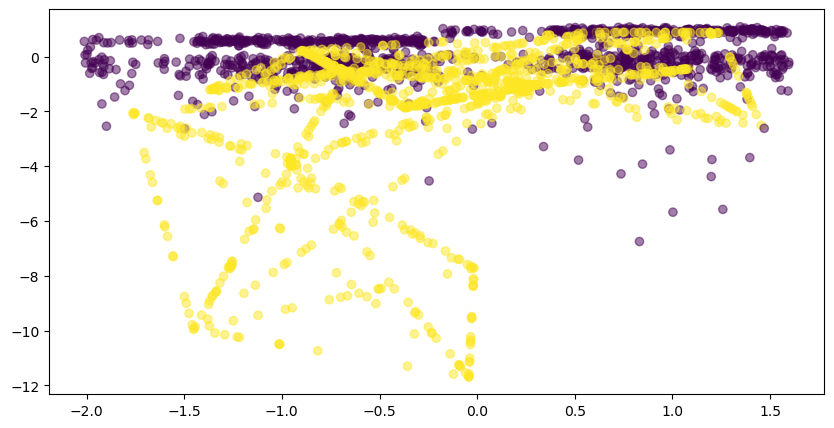

In [14]:
plt.figure(figsize = (10,5))
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c = y_train_smote, cmap = 'viridis', alpha = 0.5)
plt.show()

In [15]:
print(y_train.value_counts())
print(y_train_smote.value_counts())

Class
0    1182
1      18
Name: count, dtype: int64
Class
0    1182
1    1182
Name: count, dtype: int64


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
dt_over = DecisionTreeClassifier(max_depth = 3)
dt_over.fit(X_train_smote, y_train_smote)
y_pred_train = dt_over.predict(X_train_smote)
y_pred_test = dt_over.predict(X_test_sc)
train_acc=  accuracy_score(y_train_smote,y_pred_train )
test_acc=  accuracy_score(y_test, y_pred_test)
print(f'Train Accuracy {train_acc}')
print(f'Test Accuracy {test_acc}')
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

Train Accuracy 0.9923857868020305
Test Accuracy 0.97875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.32      1.00      0.48         8

    accuracy                           0.98       800
   macro avg       0.66      0.99      0.74       800
weighted avg       0.99      0.98      0.98       800



array([[775,  17],
       [  0,   8]], dtype=int64)

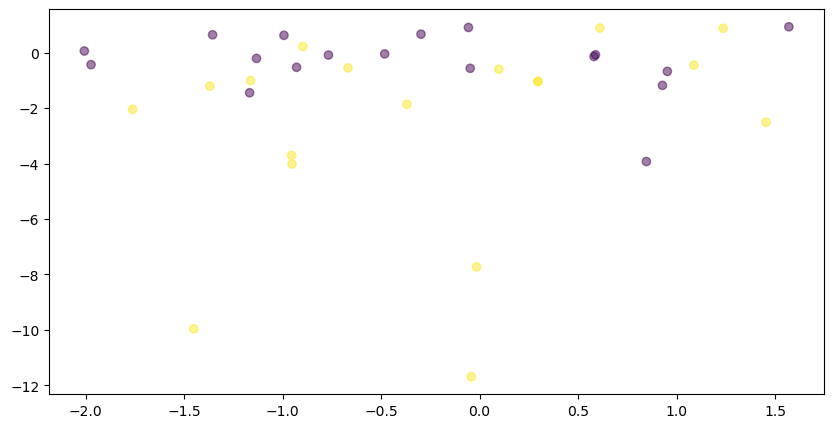

In [18]:
undersampler = RandomUnderSampler()
X_train_under, y_train_under =  undersampler.fit_resample(X_train_sc, y_train)
plt.figure(figsize = (10,5))
plt.scatter(X_train_under[:, 0], X_train_under[:, 1], c = y_train_under, cmap = 'viridis', alpha = 0.5)
plt.show()

In [19]:
print(y_train.value_counts())
print(y_train_under.value_counts())

Class
0    1182
1      18
Name: count, dtype: int64
Class
0    18
1    18
Name: count, dtype: int64


In [20]:
dt_under = DecisionTreeClassifier(max_depth = 3)
dt_under.fit(X_train_under, y_train_under)
y_pred_train = dt_under.predict(X_train_under)
y_pred_test = dt_under.predict(X_test_sc)
train_acc=  accuracy_score(y_train_under,y_pred_train )
test_acc=  accuracy_score(y_test, y_pred_test)
print(f'Train Accuracy {train_acc}')
print(f'Test Accuracy {test_acc}')
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

Train Accuracy 1.0
Test Accuracy 0.97375
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       792
           1       0.28      1.00      0.43         8

    accuracy                           0.97       800
   macro avg       0.64      0.99      0.71       800
weighted avg       0.99      0.97      0.98       800



array([[771,  21],
       [  0,   8]], dtype=int64)

In [21]:
# Applying Balanced Random Forest Classifier

brfc = BalancedRandomForestClassifier(sampling_strategy = 'all',replacement = True, bootstrap= False )
brfc.fit(X_train_sc, y_train)

BalancedRandomForestClassifier(bootstrap=False, replacement=True,
                               sampling_strategy='all')

In [22]:
y_pred_train = brfc.predict(X_train_sc)
y_pred_test = brfc.predict(X_test_sc)
train_acc=  accuracy_score(y_train,y_pred_train )
test_acc=  accuracy_score(y_test, y_pred_test)
print(f'Train Accuracy {train_acc}')
print(f'Test Accuracy {test_acc}')
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test)

Train Accuracy 0.9975
Test Accuracy 0.99125
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       792
           1       0.53      1.00      0.70         8

    accuracy                           0.99       800
   macro avg       0.77      1.00      0.85       800
weighted avg       1.00      0.99      0.99       800



array([[785,   7],
       [  0,   8]], dtype=int64)